In [1]:
%load_ext autoreload
%autoreload 2

In [23]:
import aux
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

This notebook contains the code to reproduce Figure 5 of the companion paper

### Context dependent computations (Fig5.A)

In [73]:
# load data
save_dir = "../data/data_sims/BND_IF_EEEIIEII_6pPol/"
# bg: default input rate, bg_low: low input rate, bg_high: high input rate
data_bg = aux.load_and_merge(save_dir,("2500_1s4hBreaks_17092024_metrics.npy",))
data_bg_low = aux.load_and_merge(save_dir,("task_param_sweep/2500_1s4hBreaks_rinp5Hz_26092024_metrics.npy",))
data_bg_high = aux.load_and_merge(save_dir,("task_param_sweep/2500_1s4hBreaks_rinp15Hz_26092024_metrics.npy",))

retrieved 2500/2500 simulations
retrieved 2500/2500 simulations
retrieved 2500/2500 simulations


b7d401b13b155556ff1fdafcdcfb1646 [ 0.09899529  0.02168842  0.97122812 -0.69648784 -1.6208415   0.34955794
  0.03340723  0.01843749  0.34621623 -0.30094439 -0.07869183 -0.24296246
  0.07721041  0.04380602 -0.42367217  0.24488218  0.66797048  1.05131209
  0.03858982  0.08193711 -0.48273176  0.3082352   0.8473407   0.43622023
 14.4425478 ]


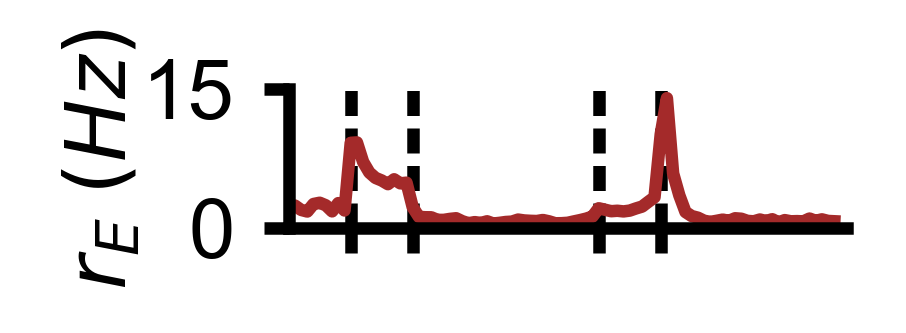

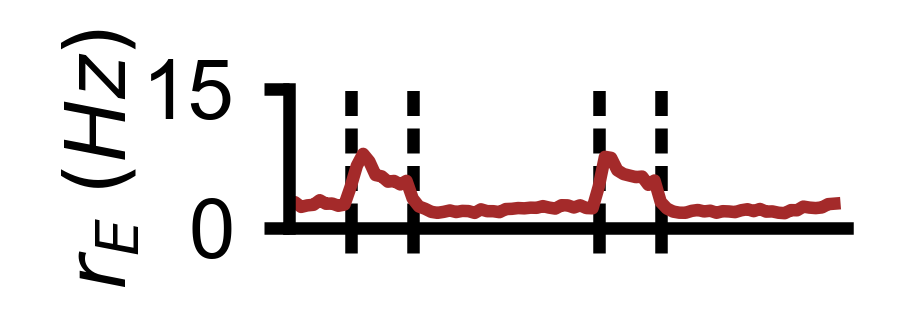

In [74]:
# the rule to plot
test_session = 6
seed = 'b7d401b13b155556ff1fdafcdcfb1646' # rule plotted in Fig5.A
ind_try = np.where((data_bg['seed'] == seed))[0][0]
print(data_bg['seed'][ind_try], data_bg['theta'][ind_try])

aux.plot_pop_rate(rs = data_bg_low[ind_try]["prate"][test_session,:],
                ts = [i for i in range(data_bg[ind_try]["prate"].shape[1])],
                t_lim = [0,90],
                y_label = r'$r_E\; (Hz)$',
                r_lim = [0,15],
                color = aux.color_ee,
                x_ticks=[10, 20, 50, 60],
                x_milestones=[10, 20, 50, 60],
                x_ticklabels=['', '', '', ''],
                x_label = None,
                fontsize = 10,
                linewidth = 1.5,
                axwidth = 1.5,
                save_path = None,
                figsize = (1.2,0.3),
                rotation=60,
                dpi=600,
                target = None); plt.show()

aux.plot_pop_rate(rs = data_bg_high[ind_try]["prate"][test_session,:],
                ts = [i for i in range(data_bg[ind_try]["prate"].shape[1])],
                t_lim = [0,90],
                y_label = r'$r_E\; (Hz)$',
                r_lim = [0,15],
                color = aux.color_ee,
                x_ticks=[10, 20, 50, 60],
                x_milestones=[10, 20, 50, 60],
                x_ticklabels=['', '', '', ''],
                x_label = None,
                fontsize = 10,
                linewidth = 1.5,
                axwidth = 1.5,
                save_path = None,
                figsize = (1.2,0.3),
                rotation=60,
                dpi=600,
                target = None); plt.show()

In [84]:
# compute delta r nov for the low input and high input simulations
dr_bgl = ((data_bg_low['r_nov'] - data_bg_low['r_fam']) / (data_bg_low['r_nov'] + data_bg_low['r_fam']+0.01))
dr_bgh = ((data_bg_high['r_nov'] - data_bg_high['r_fam']) / (data_bg_high['r_nov'] + data_bg_high['r_fam']+0.01))

# rules that switch from novelty preferring to no preference
inds = np.where( np.logical_and( np.logical_and(dr_bgl[:,6]>0.4, np.logical_and(dr_bgh[:,6]>-0.05, dr_bgh[:,6]<0.05)) , data_bg_low['rate'][:,6]>2 ) )
seeds = data_bg_low['seed'][inds]
print("rule candidates that switch from novelty to familiarity with increased bg rates: ", seeds)

rule candidates that switch from novelty to familiarity with increased bg rates:  ['15f7f8385ba456f0a1a04d4a77fc7c93' '19b1ab98ff227707ce54f6c527bbed41'
 '276426d4f4f77d4799340a7bbf4aa577' '30838827ec3675e525adb9c1cbdd9453'
 '4e82d8cd35bfea33e28bf7be21c02a0d' '4fe2d96f4c781c8676d4d7818ab634ad'
 '589190d9bc04c47a3a97de9787be8f2e' '6af087352ef5ad5870659591d9faa2de'
 '6ecc99b43954f87435517374169f95c4' '968ca310c03c3f47392e6a31a6415fd7'
 'aed0363d14c047494f07fbcba87472c1' 'b7d401b13b155556ff1fdafcdcfb1646'
 'd1db5b7d39b9a515359e06345c7ef044']


### Pong analysis (Fig5.B-F)

### MLP rules (Fig5.G)

#### Novelty detection task

In [ ]:
# load the simulations
data = aux.load_and_merge("../data/data_sims/BND_CVAIF_EEIE_T4wvceciMLP/",("BND_MLP_3103_1s1h_12122024_metrics.npy",))

#keeping only stable ones
cond_all = aux.get_ind_stable_MLP(data)
bnd = data[cond_all]
n_rules = len(bnd)
n_ts = 9

# compute network responses delta_r_mem
dr = 2*(bnd['r_nov'] - bnd['r_fam']) / (bnd['r_nov'] + bnd['r_fam']+0.01)

retrieved 3103/3103 simulations
2854 / 3103 rules fulfill the rate condition 91.97550757331615 %
2724 / 3103 rules fulfill the cv condition 87.78601353528843 %
1533 / 3103 rules fulfill the wf condition 49.40380277151144 %
1621 / 3103 rules fulfill the w_blow condition 52.23976796648405 %
3029 / 3103 rules fulfill the wc condition 97.61521108604576 %
905 / 3103 rules fulfill all conditions 29.165323880116016 %


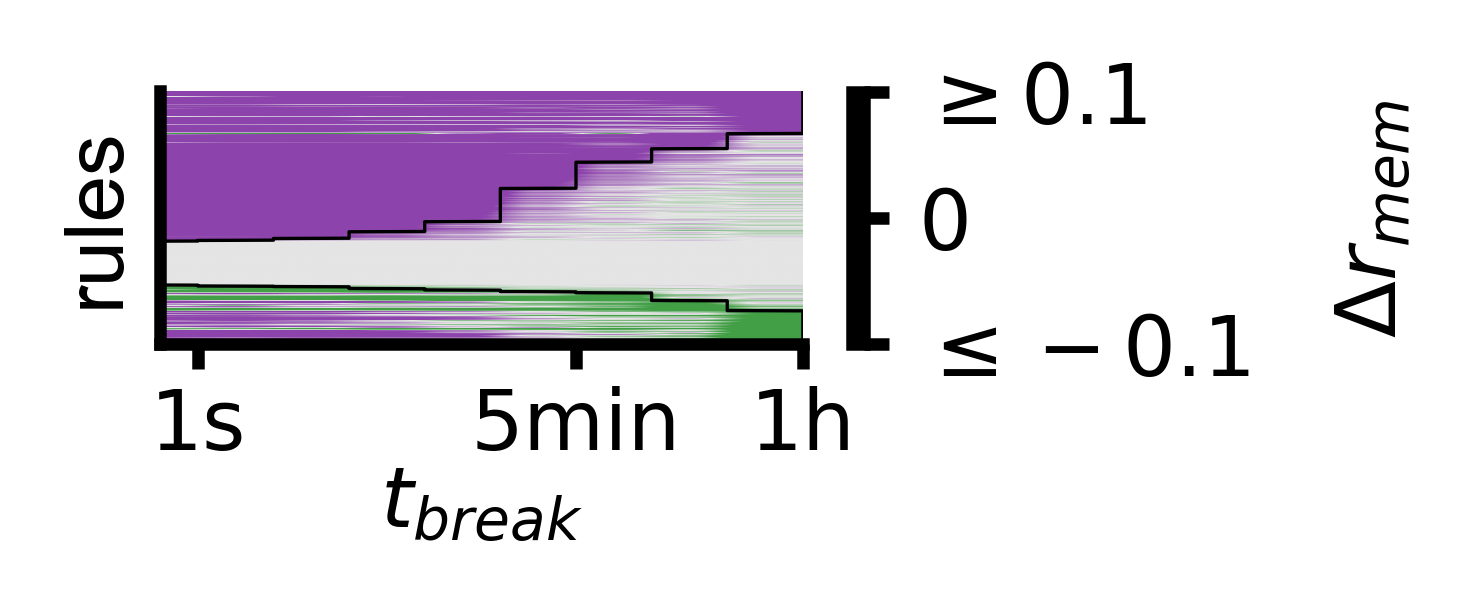

In [11]:
# looking at the last time point where the sign of the response changes
sign_resp_bnd = np.logical_or(dr > 0.1, dr < -0.1)
t_last_sign = np.zeros((n_rules))-1
for ind in range(n_rules):
    if len(np.where(sign_resp_bnd[ind,:]==True)[0]) > 0:
        t_last_sign[ind] = np.where(sign_resp_bnd[ind,:]==True)[0][-1]

dr_reordered = np.zeros( (n_rules, n_ts) )
t_last_sign_reordered = np.zeros(n_rules)-1
count_left = 0
count_right = n_rules

# counting rules with the same last time point and ordering them by the strength of the response at that time point, putting familiar-preferring rules on the left and novel-preferring rules on the right
for last_t in range(n_ts-1, -1, -1):
    ind_ts = np.where(t_last_sign == last_t)[0]
    ind_ts_fam = np.where(dr[:,last_t][ind_ts] < 0)[0]
    ind_ts_nov = np.where(dr[:,last_t][ind_ts] >= 0)[0]
    ordered_inds_fam = np.argsort(dr[:,last_t][ind_ts][ind_ts_fam])
    n_inds_fam_to_add = len(ordered_inds_fam)
    ordered_inds_nov = np.argsort(dr[:,last_t][ind_ts][ind_ts_nov])
    n_inds_nov_to_add = len(ordered_inds_nov)
    dr_reordered[count_left:(count_left+n_inds_fam_to_add)] = dr[ind_ts][ind_ts_fam][ordered_inds_fam]
    dr_reordered[(count_right-n_inds_nov_to_add):count_right] = dr[ind_ts][ind_ts_nov][ordered_inds_nov]
    t_last_sign_reordered[count_left:(count_left+n_inds_fam_to_add)] = last_t
    t_last_sign_reordered[(count_right-n_inds_nov_to_add):count_right] = last_t
    count_left += n_inds_fam_to_add
    count_right -= n_inds_nov_to_add

# defining the time points in seconds corresponding to the time breaks
breaks = [1, 9, 10, 40, 60, 180, 300, 600, 2400, 10800]
ts = [ np.sum(breaks[:i]) for i in range(1,len(breaks)+1) ]

# plotting the heatmap of the response strength ordered by the last time point where the sign of the response changes, with familiar-preferring rules on the left and novel-preferring rules on the right, and with a colorbar indicating the strength of the response
aux.plot_metric_tbreaks_all_rules(dr_reordered,
    t_last_sign_reordered,
    figsize=(1.75,0.65),
    dpi=600,
    cmap = aux.cmap_famdet,
    x_lim = [0,8.5],
    x_ticks = [0,5,8],
    x_ticklabels = ["1s","5min","1h"],
    x_label=r'$t_{break}$',
    y_lim=None,
    y_ticks=None,
    y_ticklabels=None,
    y_label="rules",
    vmin=-0.1,
    vmax=0.1,
    cbarticks=[-0.1,0,0.1],
    cbarticklabels=[r'$\leq-0.1$',r'$0$',r'$\geq 0.1$'],
    cbarhandlepad=10,
    axwidth=1.5,
    linewidth=1.5,
    xticks_pad=2,
    yticks_pad=0,
    labelpad_xlabel=0,
    rotation=0,
    labelpad_ylabel=3,
    color_ylabel='black',
    heatmap_label=r'$\Delta r_{mem}$',
    linewidth_sign=0.4)

#### Transient dynamics task

In [ ]:
# load simulations
data = aux.load_and_merge("../data/data_sims/BND_CVAIF_EEIE_T4wvceciMLP/",("BND_MLP_3103_1s1h_12122024_metrics.npy",))

# keeping only stable ones
cond_all = aux.get_ind_stable_MLP(data)
bnd = data[cond_all]
n_rules = len(bnd)
n_ts = 9

retrieved 3103/3103 simulations
2854 / 3103 rules fulfill the rate condition 91.97550757331615 %
2724 / 3103 rules fulfill the cv condition 87.78601353528843 %
1533 / 3103 rules fulfill the wf condition 49.40380277151144 %
1621 / 3103 rules fulfill the w_blow condition 52.23976796648405 %
3029 / 3103 rules fulfill the wc condition 97.61521108604576 %
905 / 3103 rules fulfill all conditions 29.165323880116016 %


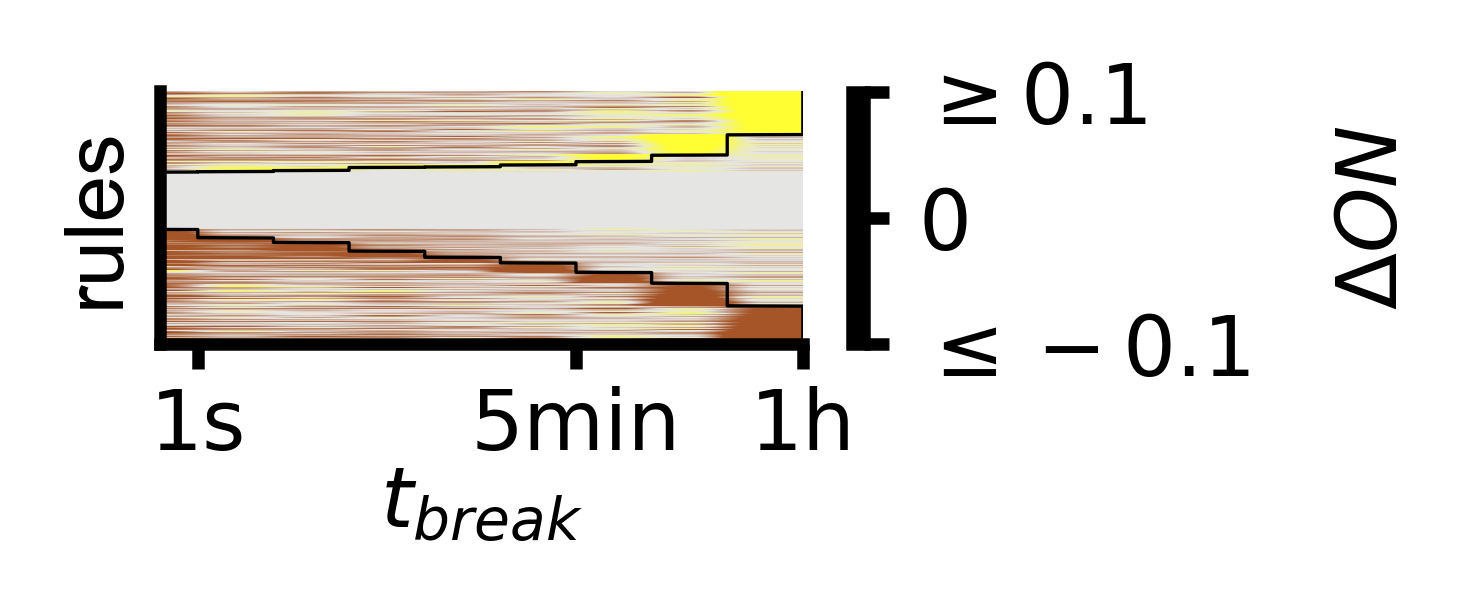

In [43]:
# compute metrics for the transient amplification task
on_nov = np.max(bnd['prate'][:,:,10:20], axis=2)/(np.nanmean(bnd['prate'][:,:,10:20], axis=2)+0.01)
offmax_nov = np.max(bnd['prate'][:,:,22:32], axis=2)/(np.nanmean(bnd['prate'][:,:,22:32], axis=2)+0.01)
offmin_nov = np.min(bnd['prate'][:,:,22:32], axis=2)/(np.nanmean(bnd['prate'][:,:,22:32], axis=2)+0.01)
on_fam = np.max(bnd['prate'][:,:,50:60], axis=2)/(np.nanmean(bnd['prate'][:,:,50:60], axis=2)+0.01)
offmax_fam = np.max(bnd['prate'][:,:,62:72], axis=2)/(np.nanmean(bnd['prate'][:,:,62:72], axis=2)+0.01)
offmin_fam = np.min(bnd['prate'][:,:,62:72], axis=2)/(np.nanmean(bnd['prate'][:,:,62:72], axis=2)+0.01)
DeltaON = 2*(on_nov-on_fam)/(on_nov+on_fam)
DeltaOFFmax = 2*(offmax_nov-offmax_fam)/(offmax_nov+offmax_fam)
DeltaOFFmin = 2*(offmin_nov-offmin_fam)/(offmin_nov+offmin_fam)

# looking at the last time point where the sign of the response changes
sign_resp_trampl = np.logical_or(DeltaON > 0.1, DeltaON < -0.1)
t_last_sign = np.zeros((n_rules))-1
for ind in range(n_rules):
    if len(np.where(sign_resp_trampl[ind,:]==True)[0]) > 0:
        t_last_sign[ind] = np.where(sign_resp_trampl[ind,:]==True)[0][-1]

# counting rules with the same last time point and ordering them by the strength of the response at that time point, putting familiar-preferring rules on the left and novel-preferring rules on the right
DeltaON_reordered = np.zeros( (n_rules, n_ts) )
t_last_sign_reordered = np.zeros(n_rules)-1
count_left = 0
count_right = n_rules

for last_t in range(n_ts-1, -1, -1):
    ind_ts = np.where(t_last_sign == last_t)[0]
    ind_ts_fam = np.where(DeltaON[:,last_t][ind_ts] < 0)[0]
    ind_ts_nov = np.where(DeltaON[:,last_t][ind_ts] >= 0)[0]
    ordered_inds_fam = np.argsort(DeltaON[:,last_t][ind_ts][ind_ts_fam])
    n_inds_fam_to_add = len(ordered_inds_fam)
    ordered_inds_nov = np.argsort(DeltaON[:,last_t][ind_ts][ind_ts_nov])
    n_inds_nov_to_add = len(ordered_inds_nov)
    DeltaON_reordered[count_left:(count_left+n_inds_fam_to_add)] = DeltaON[ind_ts][ind_ts_fam][ordered_inds_fam]
    DeltaON_reordered[(count_right-n_inds_nov_to_add):count_right] = DeltaON[ind_ts][ind_ts_nov][ordered_inds_nov]
    t_last_sign_reordered[count_left:(count_left+n_inds_fam_to_add)] = last_t
    t_last_sign_reordered[(count_right-n_inds_nov_to_add):count_right] = last_t
    count_left += n_inds_fam_to_add
    count_right -= n_inds_nov_to_add

# defining the time points in seconds corresponding to the time breaks
breaks = [1, 9, 10, 40, 60, 180, 300, 600, 2400, 10800]
ts = [ np.sum(breaks[:i]) for i in range(1,len(breaks)+1) ]

# plotting the heatmap of the response strength ordered by the last time point where the sign of the response changes
aux.plot_metric_tbreaks_all_rules(DeltaON_reordered,
    t_last_sign_reordered,
    figsize=(1.75,0.65),
    dpi=600,
    cmap = aux.cmp_transdyn,
    x_lim = [0,8.5],
    x_ticks = [0,5,8],
    x_ticklabels = ["1s","5min","1h"],
    x_label=r'$t_{break}$',
    y_lim=None,
    y_ticks=None,
    y_ticklabels=None,
    y_label="rules",
    vmin=-0.1,
    vmax=0.1,
    cbarticks=[-0.1,0,0.1],
    cbarticklabels=[r'$\leq-0.1$',r'$0$',r'$\geq 0.1$'],
    cbarhandlepad=10,
    axwidth=1.5,
    linewidth=1.5,
    xticks_pad=2,
    yticks_pad=0,
    labelpad_xlabel=0,
    rotation=0,
    labelpad_ylabel=3,
    color_ylabel='black',
    heatmap_label=r'$\Delta ON$',
    linewidth_sign=0.4)

#### Sequential task: successor representations

In [ ]:
# loading the simulations of the sequence task
data_seq = aux.load_and_merge("../data/data_sims/seq_CVAIF_EEIE_T4wvceciMLP/",("seq_MLP_3103_1s1h_27122024_metrics.npy",))
data = aux.load_and_merge("../data/data_sims/BND_CVAIF_EEIE_T4wvceciMLP/",("BND_MLP_3103_1s1h_12122024_metrics.npy",))
cond_all = aux.get_ind_stable_MLP(data)
seq = data_seq[cond_all]
seq_list = [seq]

# compute metrics on the sequence task
n_fam = 5 #number of familiar stimuli
n_nov = 2 #number of novel stimuli
n_tot = 7 #total number of stimuli, including novel ones
n_rules = seq['eng_rate'].shape[0]
n_tests = seq['eng_rate'].shape[1]
n_engs = seq['eng_rate'].shape[2]
n_bins = seq['eng_rate'].shape[3]
ontime_test = 2 #in number of bins. usually bin is 0.1s
offtime_test = 28 #in number of bins. usually bin is 0.1s
test_starts = 10 #in number of bins, how long do we record pretest (usually 1s)
t_breaks = [1, 9,  10, 40, 60,  180, 300, 600,  2400]
total_breaks = [np.sum(t_breaks[:i+1]) for i in range(len(t_breaks))]
# assume that the ordering of pretraining and testing of stimuli is the same: n1 n2 f1 f2 f3 f4 f5
succ = np.array([aux.compute_succ(eng_rate=seq['eng_rate'], n_tot=n_tot, n_bins=n_bins, 
                                  test_starts=test_starts, ontime_test=ontime_test,
                                  offtime_test=offtime_test,n_rules=n_rules, n_tests=n_tests,
                                  n_fam=n_fam, n_engs=n_engs, method='both',
                                  raw_r_rest=seq['non_eng_rate'], raw_r_pop=seq['prate']) for seq in seq_list])
succ = np.mean(succ, axis=4)

retrieved 3103/3103 simulations


In [26]:
# compute the metrics for the t-test comparing familiar and novel stimuli
fams_novs_ttest = [aux.get_rsucc_rnov(eng_rate=seq['eng_rate'], n_tot=n_tot, n_bins=n_bins, test_starts=test_starts, ontime_test=ontime_test, offtime_test=offtime_test,
                 n_rules=n_rules, n_tests=n_tests, n_fam=n_fam, n_engs=n_engs) for seq in seq_list]
r_non_eng_ttest = [aux.get_r_rest(n_tot, n_bins, test_starts, ontime_test, offtime_test,
                                  seq['non_eng_rate'], n_rules, n_engs, n_tests) for seq in seq_list]
r_prate_ttest = [aux.get_r_rest(n_tot, n_bins, test_starts, ontime_test, offtime_test,
                                  seq['prate'], n_rules, n_engs, n_tests) for seq in seq_list]

metric_num = 3 #3 means next stimulus activity
method = "both"
n_ts = 9
proportion = np.zeros(n_ts)
pvalues =np.zeros((n_rules, n_ts))
for test_num in range(n_ts):
    for rule_num in range(n_rules):
        fam_samples = np.array( [ fams_novs_ttest[i][0][rule_num,test_num,metric_num,:] for i in range(len(seq_list)) ] ).flatten()
        if method == "both": ### averaging nov1 and nov2
            nov_samples = np.array( [ fams_novs_ttest[i][1][rule_num,test_num,:,:] for i in range(len(seq_list)) ] ).flatten()
        else:
            print("method unknown")   
        pvalues[rule_num, test_num] = ttest_ind(nov_samples, fam_samples).pvalue
    proportion[test_num] = np.sum(pvalues[:,test_num]<0.05)/len(pvalues[:,test_num])

In [27]:
# looking at the last time point where the p-value is significant < 0.05
# we do not compensate for multiple test
sign_resp = succ[0,:,:,3]<0.9
t_last_sign = np.zeros((n_rules))-1
for ind in range(n_rules):
    if len(np.where(sign_resp[ind,:]==True)[0]) > 0:
        t_last_sign[ind] = np.where(sign_resp[ind,:]==True)[0][-1]
av_succ = np.mean(succ, axis=0)[:,:,metric_num]
av_succ_reordered = np.zeros( (n_rules, n_ts) ) + 1
t_last_sign_reordered = np.zeros(n_rules)-1
count_left = 0
count_right = n_rules
for last_t in range(n_ts-1, -1, -1):
    ind_ts = np.where(t_last_sign == last_t)[0]
    ind_ts_fam = np.where(av_succ[:,last_t][ind_ts] < 1)[0]
    ind_ts_nov = np.where(av_succ[:,last_t][ind_ts] >= 1)[0]
    ordered_inds_fam = np.argsort(av_succ[:,last_t][ind_ts][ind_ts_fam])
    n_inds_fam_to_add = len(ordered_inds_fam)
    ordered_inds_nov = np.argsort(av_succ[:,last_t][ind_ts][ind_ts_nov])
    n_inds_nov_to_add = len(ordered_inds_nov)
    av_succ_reordered[count_left:(count_left+n_inds_fam_to_add)] = av_succ[ind_ts][ind_ts_fam][ordered_inds_fam]
    av_succ_reordered[(count_right-n_inds_nov_to_add):count_right] = av_succ[ind_ts][ind_ts_nov][ordered_inds_nov]
    t_last_sign_reordered[count_left:(count_left+n_inds_fam_to_add)] = last_t
    t_last_sign_reordered[(count_right-n_inds_nov_to_add):count_right] = last_t
    count_left += n_inds_fam_to_add
    count_right -= n_inds_nov_to_add

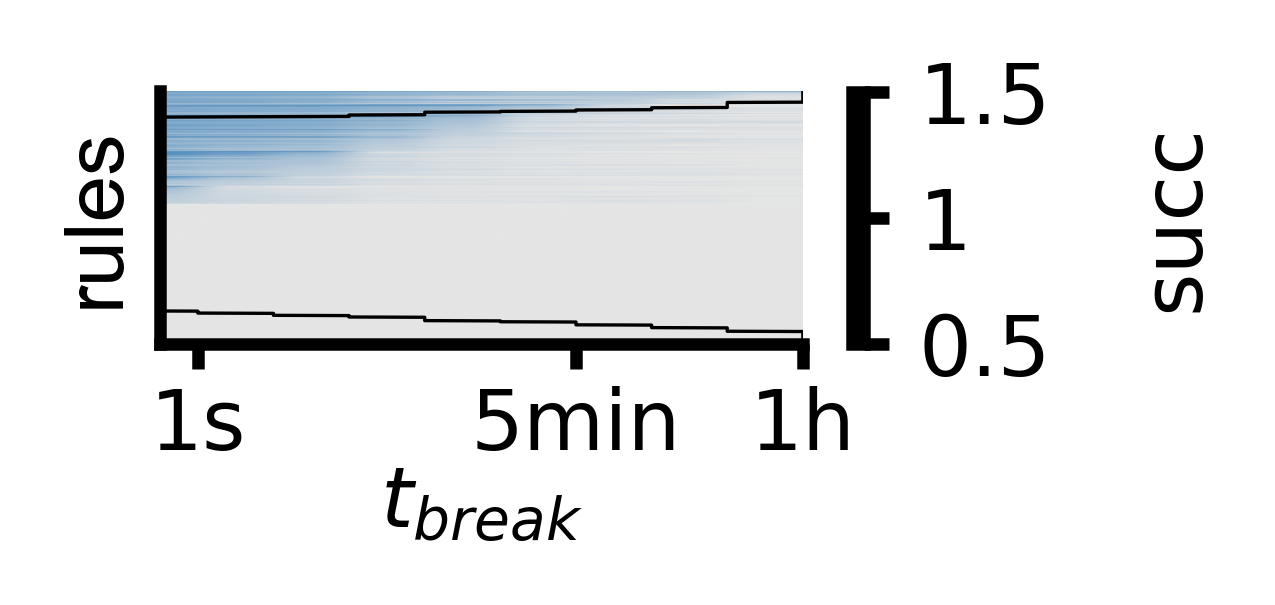

In [41]:
# defining the time points in seconds corresponding to the time breaks
breaks = [1, 9, 10, 40, 60, 180, 300, 600, 2400]
ts = [ np.sum(breaks[:i]) for i in range(1,len(breaks)+1) ]

# plotting the heatmap of the response strength ordered by the last time point where the response stops being significant
aux.plot_metric_tbreaks_all_rules(av_succ_reordered,
    t_last_sign_reordered,
    figsize=(1.75,0.65),
    dpi=600,
    cmap = aux.cmp_succrep,
    x_lim = [0,8.5],
    x_ticks = [0,5,8],
    x_ticklabels = ["1s","5min","1h"],
    x_label=r'$t_{break}$',
    y_lim=None,
    y_ticks=None,
    y_ticklabels=None,
    y_label="rules",
    vmin=0.5,
    vmax=1.5,
    cbarticks=[0.5,1,1.5],
    cbarticklabels=[0.5,1,1.5],
    cbarhandlepad=10,
    axwidth=1.5,
    linewidth=1.5,
    xticks_pad=2,
    yticks_pad=0,
    labelpad_xlabel=0,
    rotation=0,
    labelpad_ylabel=3,
    color_ylabel='black',
    heatmap_label=r'succ',
    linewidth_sign=0.4)

#### Contextual novelty task

In [ ]:
data_seq = aux.load_and_merge("../data/data_sims/seq_CVAIF_EEIE_T4wvceciMLP/",("seq_MLP_3103_1s1h_27122024_metrics.npy",))
data = aux.load_and_merge("../data/data_sims/BND_CVAIF_EEIE_T4wvceciMLP/",("BND_MLP_3103_1s1h_12122024_metrics.npy",))
cond_all = aux.get_ind_stable_MLP(data)

seq = data_seq[cond_all]
seq_list = [seq]

retrieved 3103/3103 simulations
retrieved 3103/3103 simulations
2854 / 3103 rules fulfill the rate condition 91.97550757331615 %
2724 / 3103 rules fulfill the cv condition 87.78601353528843 %
1533 / 3103 rules fulfill the wf condition 49.40380277151144 %
1621 / 3103 rules fulfill the w_blow condition 52.23976796648405 %
3029 / 3103 rules fulfill the wc condition 97.61521108604576 %
905 / 3103 rules fulfill all conditions 29.165323880116016 %


In [ ]:
# computing the metrics for the contextual novelty task
aux_big_array = np.array([aux.get_dr_stfam(n_bins=n_bins, test_starts=test_starts, ontime_test=ontime_test, offtime_test=offtime_test, rpop=seq['prate'],n_fam=n_fam,n_nov=n_nov) for seq in seq_list])
dr_famnov_list = aux_big_array[:,0,:,:]
dr_novnov_list = aux_big_array[:,1,:,:]

inds_stim = aux.get_inds_last_el_sequence_stim_pres(n_bins, test_starts, ontime_test, offtime_test,n_fam,n_nov)
r_famfam =  np.array( [[np.mean(seq['prate'][:,:,inds_stim[i]], axis=2) for i in range(5)] for seq in seq_list ] )
r_famnov =  np.array( [[np.mean(seq['prate'][:,:,inds_stim[i]], axis=2) for i in range(5,10)] for seq in seq_list ] )
r_novnov =  np.array( [[np.mean(seq['prate'][:,:,inds_stim[i]], axis=2) for i in range(10,15)] for seq in seq_list ] )

n_ts = 9
proportion_famnov = np.zeros(n_ts)
proportion_novnov = np.zeros(n_ts)
for t in range(n_ts):
    pvalues_famnov =np.zeros(n_rules)
    pvalues_novnov =np.zeros(n_rules)
    for ind in range(n_rules):
        r_famfam_samples = r_famfam[:,:,ind,t].flatten()
        r_famnov_samples = r_famnov[:,:,ind,t].flatten()
        r_novnov_samples = r_novnov[:,:,ind,t].flatten()
        pvalues_famnov[ind] = ttest_ind(r_famnov_samples, r_famfam_samples).pvalue
        pvalues_novnov[ind] = ttest_ind(r_novnov_samples, r_famfam_samples).pvalue
    proportion_famnov[t] = np.sum(pvalues_famnov<0.05)/len(pvalues_famnov)
    proportion_novnov[t] = np.sum(pvalues_novnov<0.05)/len(pvalues_novnov)

In [36]:
# looking at the last time point where the p-value is significant < 0.05
# we do not compensate for multiple test
sign_resp = np.logical_or(dr_famnov_list[0,:,:] > 0.05, dr_famnov_list[0,:,:] < -0.05)
## Find time of last singificant response
t_last_sign = np.zeros((n_rules))-1
for ind in range(n_rules):
    if len(np.where(sign_resp[ind,:]==True)[0]) > 0:
        t_last_sign[ind] = np.where(sign_resp[ind,:]==True)[0][-1]

    dr_famnov = dr_famnov_list[0,:,:]
dr_famnov_reordered = np.zeros( (n_rules, n_ts) )
t_last_sign_reordered = np.zeros(n_rules)-1
count_left = 0
count_right = n_rules

for last_t in range(n_ts-1, -1, -1):
    ind_ts = np.where(t_last_sign == last_t)[0]
    ind_ts_fam = np.where(dr_famnov[:,last_t][ind_ts] < 0)[0]
    ind_ts_nov = np.where(dr_famnov[:,last_t][ind_ts] >= 0)[0]
    ordered_inds_fam = np.argsort(dr_famnov[:,last_t][ind_ts][ind_ts_fam])
    n_inds_fam_to_add = len(ordered_inds_fam)
    ordered_inds_nov = np.argsort(dr_famnov[:,last_t][ind_ts][ind_ts_nov])
    n_inds_nov_to_add = len(ordered_inds_nov)
    dr_famnov_reordered[count_left:(count_left+n_inds_fam_to_add)] = dr_famnov[ind_ts][ind_ts_fam][ordered_inds_fam]
    dr_famnov_reordered[(count_right-n_inds_nov_to_add):count_right] = dr_famnov[ind_ts][ind_ts_nov][ordered_inds_nov]
    t_last_sign_reordered[count_left:(count_left+n_inds_fam_to_add)] = last_t
    t_last_sign_reordered[(count_right-n_inds_nov_to_add):count_right] = last_t
    count_left += n_inds_fam_to_add
    count_right -= n_inds_nov_to_add

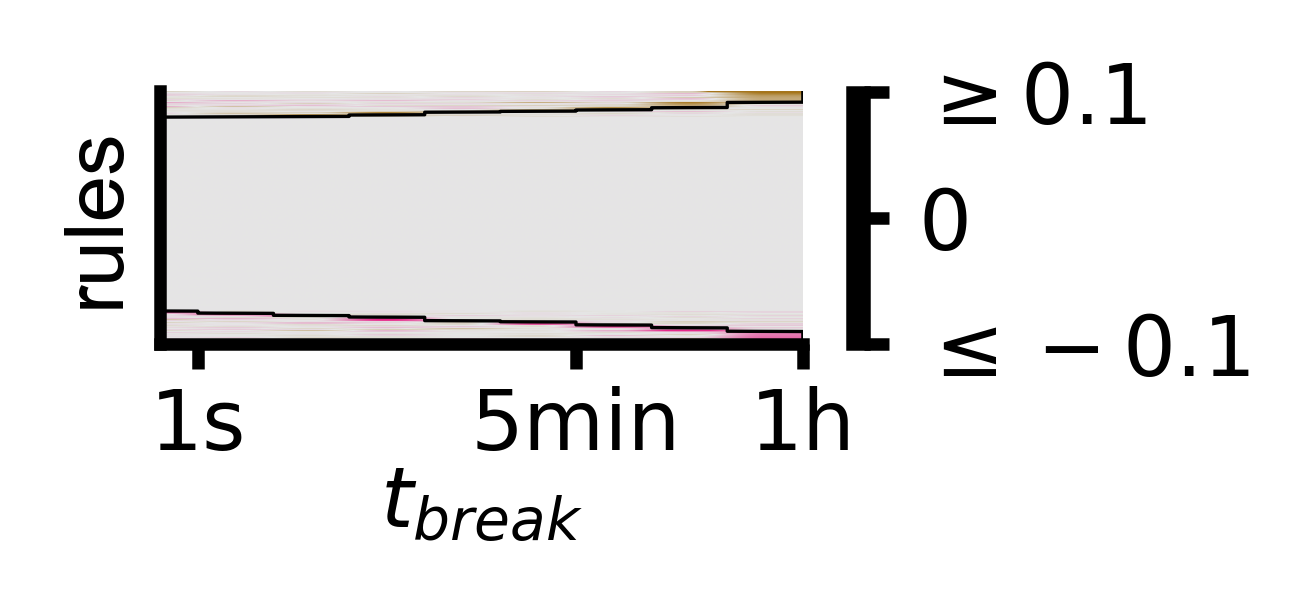

In [38]:
# defining the time points in seconds corresponding to the time breaks
breaks = [1, 9, 10, 40, 60, 180, 300, 600, 2400]
ts = [ np.sum(breaks[:i]) for i in range(1,len(breaks)+1) ]

# plotting the heatmap of the response strength ordered by the last time point where the response stops being significant
aux.plot_metric_tbreaks_all_rules(dr_famnov_reordered,
    t_last_sign_reordered,
    figsize=(1.75, 0.65),#(1.75,1.15),
    dpi=600,
    cmap = aux.cmp_contnov,
    x_lim = [0,8.5],
    x_ticks = [0,5,8],
    x_ticklabels = ["1s","5min","1h"],
    x_label=r'$t_{break}$',
    y_lim=None,
    y_ticks=None,
    y_ticklabels=None,
    y_label="rules",
    vmin=-0.1,
    vmax=0.1,
    cbarticks=[-0.1,0,0.1],
    cbarticklabels=[r'$\leq-0.1$',r'$0$',r'$\geq 0.1$'],
    cbarhandlepad=10,
    axwidth=1.5,
    linewidth=1.5,
    xticks_pad=2,
    yticks_pad=0,
    labelpad_xlabel=0,
    rotation=0,
    labelpad_ylabel=3,
    color_ylabel='black',
    heatmap_label=r'',
    linewidth_sign=0.4)

#### Plot example rules

In [ ]:
# load simulation data
bnd = aux.load_and_merge("../data/data_sims/BND_CVAIF_EEIE_T4wvceciMLP/",("BND_MLP_3103_1s1h_12122024_metrics.npy",))

retrieved 3103/3103 simulations


198543c81bb0102ee331430f23395340 [ 1.72222499e-02  2.48461511e-05  9.06718016e-01  9.34689045e-01
 -2.74628073e-01 -6.93889678e-01  6.69170320e-02 -8.39187980e-01
 -2.00735778e-01 -8.32785368e-01 -2.08006985e-02  3.51631343e-01
 -3.16201150e-01  5.04305363e-02 -6.23449147e-01 -8.75209868e-01
  6.70615792e-01  1.34256214e-01 -2.99133390e-01  3.18923444e-01
  9.25907731e-01 -1.03724964e-01  7.32317448e+00] [-0.29989616 -0.31582145 -0.27727735 -0.27464161 -0.24238282 -0.17674124
 -0.21639089 -0.33157033 -0.46763736]


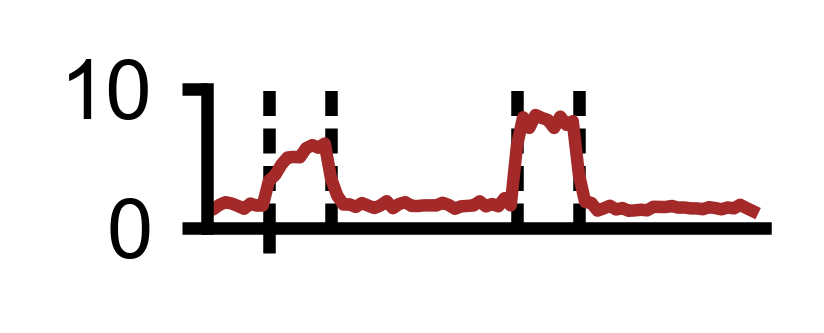

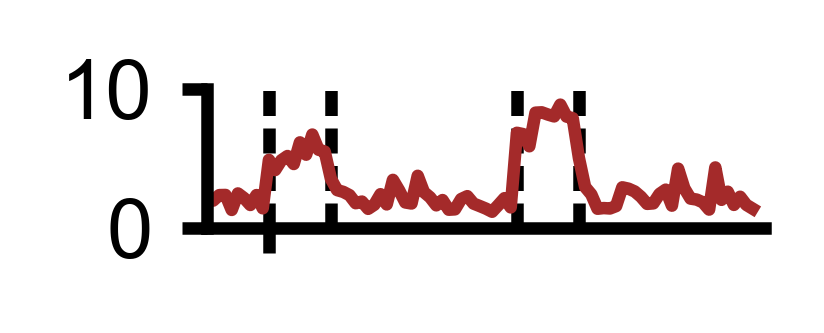

In [53]:
# Example rules on the familiarity task
seed1 = '198543c81bb0102ee331430f23395340' # familiar-prefering
seed2 = '3200a9fa2841796277a06495a66e0d7f' # novel-prefering

seed = seed1 # choose which one to plot
ind_seed = np.where(bnd['seed'] == seed)[0][0]
print(bnd['seed'][ind_seed], bnd['theta'][ind_seed], dr[ind_seed,:])
r_max = 10

ax_pop_rate = aux.plot_pop_rate(rs = bnd[ind_seed]["prate"][1,:],
                           ts = [i for i in range(bnd[ind_seed]["prate"].shape[1])],
                           t_lim = [0,90],
                           y_label = '',
                           r_lim = [0,r_max],
                           y_ticks = [0,r_max],
                           color = aux.color_ee,
                           x_ticks=[10],
                           x_milestones=[10, 20, 50, 60],
                           x_ticklabels=[''],
                           x_label = None,
                           fontsize = 10,
                           linewidth = 1.5,
                           axwidth = 1.5,
                           save_path = None,
                           figsize = (1.2,0.3),
                           rotation=60,
                           dpi=600,
                           target = None); plt.show()

ax_pop_rate = aux.plot_pop_rate(rs = bnd[ind_seed]["prate"][-1,:],
                           ts = [i for i in range(bnd[ind_seed]["prate"].shape[1])],
                           t_lim = [0,90],
                           y_label = '',
                           r_lim = [0,r_max],
                           y_ticks = [0,r_max],
                           color = aux.color_ee,
                           x_ticks=[10],
                           x_milestones=[10, 20, 50, 60],
                           x_ticklabels=[''],
                           x_label = None,
                           fontsize = 10,
                           linewidth = 1.5,
                           axwidth = 1.5,
                           save_path = None,
                           figsize = (1.2,0.3),
                           rotation=60,
                           dpi=600,
                           target = None); plt.show()

In [ ]:
# Example rule on the sequential task
# For this we need to load actual spiketimes for raster plots, which are not included in the npy files

seed = '868d3f7d4cc437b24f6efd2cc0cdf8da'
filename = "seq_MLP_3103_1s1h_27122024"
sts = np.load("../data/data_sims/seq_CVAIF_EEIE_T4wvceciMLP/" + filename + "_" + seed + ".npy" , allow_pickle=True).item()

In [63]:
# compute the firing rate of each engram in the network
n_recorded = 4096
l_stim_on_pretraineng = 1
l_stim_off_pretraineng = 1
l_pre_test_record = 1
frac_size_engram = 0.05
lpt = 30
lt = 50
n_fam_stim = 5
n_nov_stim = 2
n_tot_stim = 7
ontime_test = 0.2
offtime_test = 2.8
nseqs_test = 15
seq_length_test = 4
break_durations = [1, 9, 10, 40, 60, 180, 300, 600, 2400]
n_tests = len(break_durations)
bin_size_big = 0.1
l_pretraineng_tot = n_tot_stim*(l_stim_on_pretraineng+l_stim_off_pretraineng)
l_singlestims_test = n_tot_stim*(ontime_test + offtime_test)
l_seqstims_test = nseqs_test*(seq_length_test*ontime_test+offtime_test)
l_1test = l_singlestims_test + l_seqstims_test
test_starts = np.zeros(len(break_durations))
test_starts[0] = lpt + l_pretraineng_tot + lt + break_durations[0]
for i in range(1,len(break_durations)):
    test_starts[i] = test_starts[i-1] + break_durations[i] + l_1test
engram_neurons = aux.get_engram_neurons(n_tot_stim, lpt, l_stim_on_pretraineng, l_stim_off_pretraineng, frac_size_engram, n_recorded, sts)
eng_rates = aux.get_eng_rate(sts, test_starts, l_pre_test_record, l_1test, bin_size_big, n_tests, n_recorded, n_tot_stim, engram_neurons)

# order the neurons per engram
# problem, some neurons can be assigned to 2 engrams, though it is rare.
# assign a unique label to each neuron
neuron_label = np.zeros(n_recorded) + 7 #0->nov1, ... 6->fam5, 7 unassigned
for i in range(n_recorded):
    found = False
    eng_count = 0
    while (not found) and (eng_count <= 6):
        if len(np.argwhere(engram_neurons[eng_count, :] == i))>0:
            found = True
            neuron_label[i] = eng_count
        eng_count += 1

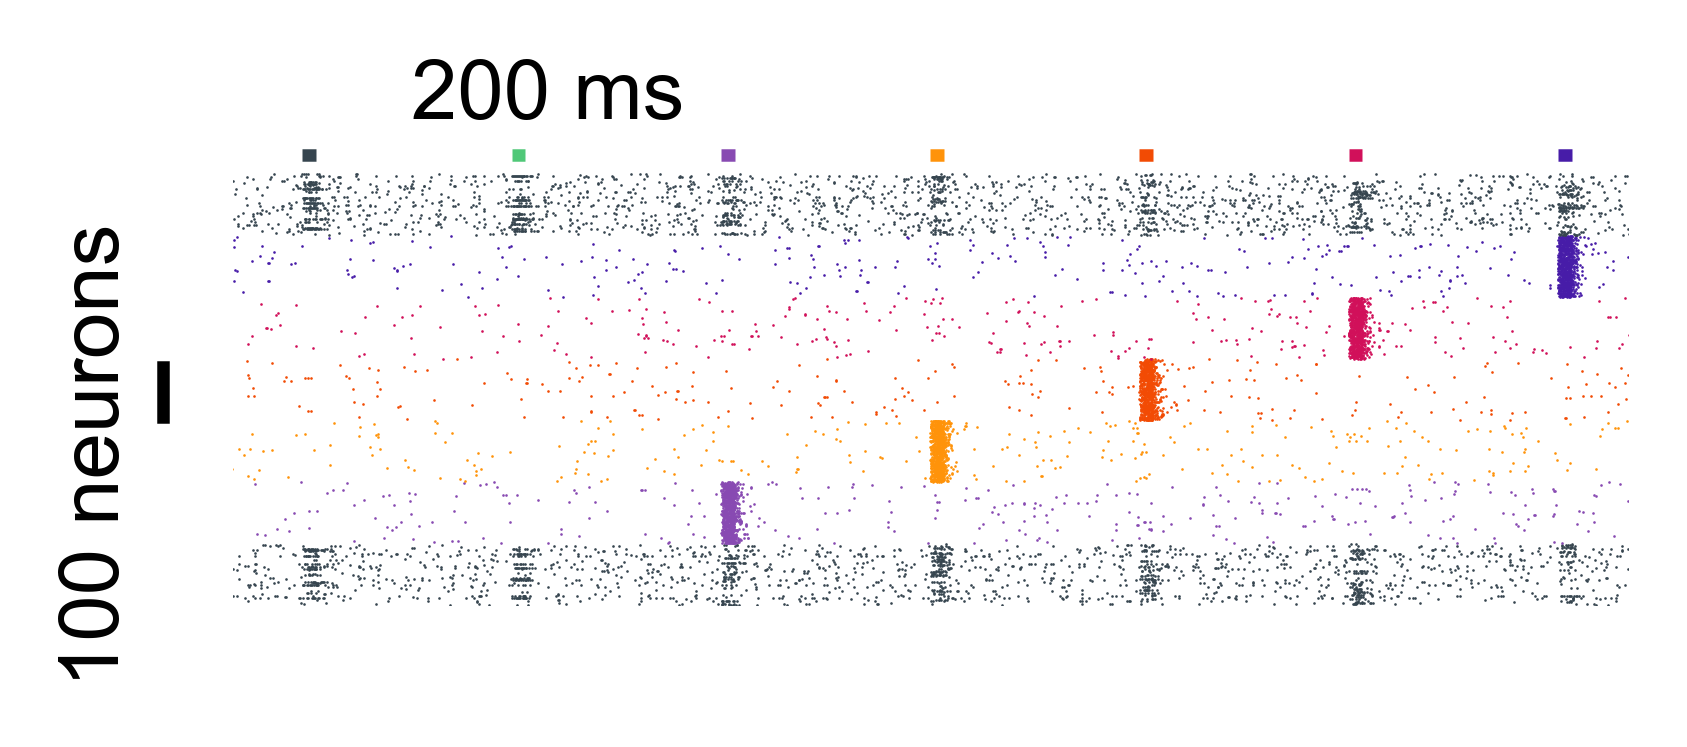

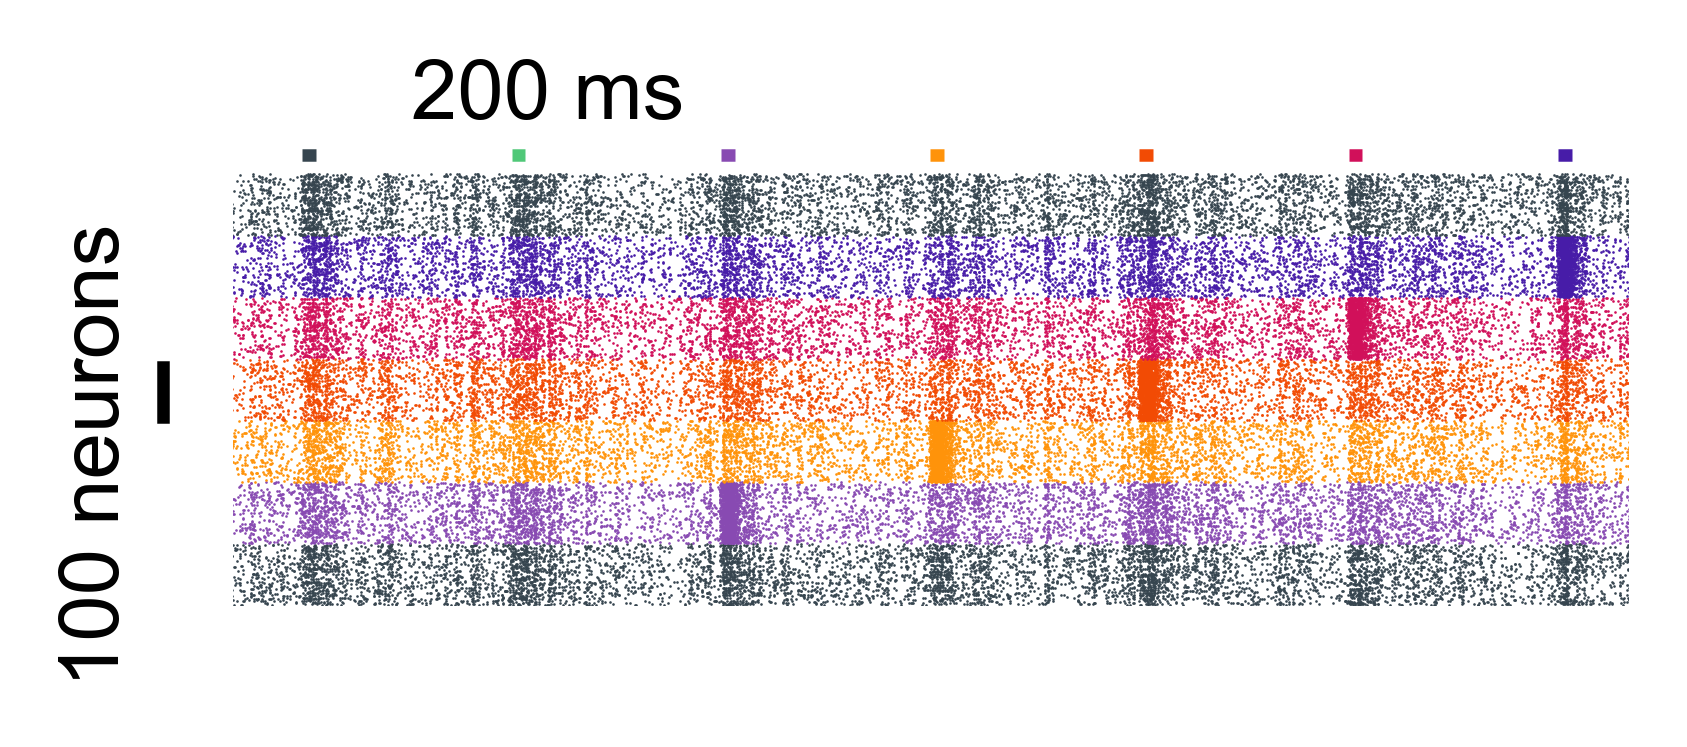

In [64]:
for test_session in [2, -1]:
    neuron_label_bis = np.array(neuron_label)
    neuron_label_bis[np.where(neuron_label_bis==0)[0]] = -1
    neuron_label_bis[np.where(neuron_label_bis==1)[0]] = -1
    neuron_label_bis[np.where(neuron_label_bis==2)[0][100:]] = -1
    neuron_label_bis[np.where(neuron_label_bis==3)[0][100:]] = -1
    neuron_label_bis[np.where(neuron_label_bis==4)[0][100:]] = -1
    neuron_label_bis[np.where(neuron_label_bis==5)[0][100:]] = -1
    neuron_label_bis[np.where(neuron_label_bis==6)[0][100:]] = -1
    neuron_label_bis[np.where(neuron_label_bis==7)[0][:100]] = 0
    neuron_label_bis[np.where(neuron_label_bis==7)[0][100:]] = -1
    aux.plot_raster_w_engrams(sts=sts,
        neuron_labels=neuron_label_bis,
        n_recorded=n_recorded,
        label_colors = ['#36454F', aux.color_nov1, aux.color_fam1, aux.color_fam2, aux.color_fam3, aux.color_fam4, aux.color_fam5, '#36454F'],
        x_lim = [test_starts[test_session]-1, test_starts[test_session]+l_singlestims_test -2],
        markersize=0.1,
        t_start_each_stim = [i*(ontime_test + offtime_test) for i in range(7)] + test_starts[test_session],
        ontime = ontime_test,
        linewidth_stim_line=1.5,
        y_stim_line = 730,
        figsize= (3,1),
        x_label= "200 ms",
        x_ticks= [],
        x_ticklabels= [],
        y_ticks=[],
        y_label="100 neurons",
        y_lim=[0,750],
        fontsize=10,
        dpi=600,
        ylabel_xloc=0.05,
        ylabel_yloc=0.0,
        xlabel_xloc=0.30,
        xlabel_yloc=0.92,
        y_bar_xloc=-0.05,
        axwidth=1.5);plt.show()